In [2]:
#Classification

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#import digits dataset
digits = datasets.load_digits()

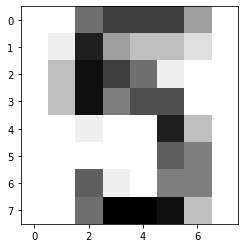

In [3]:
#Display image 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [4]:
#Spliting dataset to train and test

X = digits.data
y = digits.target

#Spliting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)


In [5]:
#Create a KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the classifier to the training data
knn.fit(X_train,y_train)

#Print accuracy
print('Accuracy: {0}'.format(knn.score(X_test,y_test)))


Accuracy: 0.9861111111111112


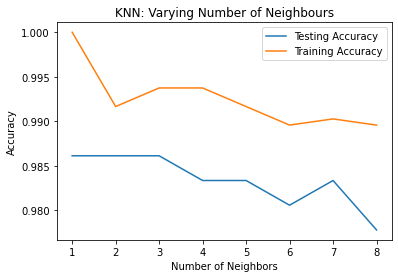

In [6]:
#Varying Number of Neighbours

#Setup arrays to store train and test accuracy
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Loop over different values of k
for i,k in enumerate(neighbors):
    #Setup a KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i]  = knn.score(X_test, y_test)

#Generate plot
plt.title('KNN: Varying Number of Neighbours')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [7]:
#Linear Regression

df = pd.read_csv('./files/gapminder.csv')

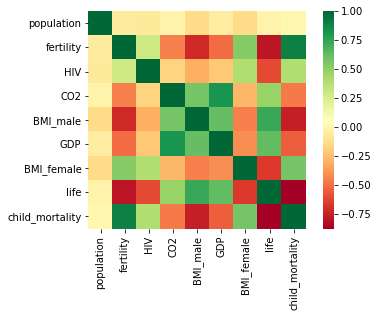

In [8]:
ax = sns.heatmap(df.corr(),square=True,cmap='RdYlGn')
plt.show()


In [9]:
x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)

#Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size=0.3, random_state=42)

#Create the regression model
reg = LinearRegression()

#Fit the regression on the training data
reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

#Print accuracy
print(reg.score(x_fertility, y_life))


0.6162438752151919


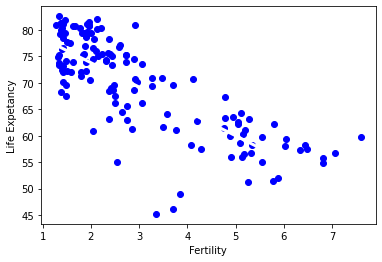

In [10]:
#Plot regression line
plt.scatter(x_fertility, y_life, color='blue')
plt.plot(prediction_space, y_predict, color='white',linewidth=3)
plt.ylabel('Life Expetancy')
plt.xlabel('Fertility')
plt.show()


In [11]:
#Predicting with all features

features = pd.read_csv('./files/gapminder.csv')
df = pd.read_csv('./files/gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

#Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

#Create the regression model
reg_all = LinearRegression()

#Fit the model to the training data
reg_all.fit(x_train,y_train)

#Print Accuracy
print(reg_all.score(features,y_life))


0.8914651485793137


In [13]:
#Recommendation Systems

#Cosine Similarity

def user_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=1)
    sim_users = sim_matrix(M,'user',metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j]=avg_ratings[i] + np.nansum(sim_users[i]*(M[:,j]-avg_ratings))/sum(sim_users[i])
    return pred

In [14]:
#Item-based CF

def item_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=0)
    sim_items = sim_matrix(M,'item',metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j]=avg_ratings[i] + np.nansum(sim_items[i]*(M[i,:]-avg_ratings))/sum(sim_items[i])
    return pred


In [16]:
#Compute the predictive accuracy of the above recommendations

evaluateRS(M,M_result, 'user_cf', 'cosine')
evaluateRS(M,M_result, 'user_cf', 'correlation')
evaluateRS(M,M_result, 'item_cf', 'cosine')
evaluateRS(M,M_result, 'item_cf', 'correlation')

NameError: name 'evaluateRS' is not defined

In [17]:
#Compute the ranking quality of the above recommendations

results =[]
for method in ['user_cf', 'item_cf']:
    for metric in ['cosine','correlation']:
        rank_acc=evaluate_rank(M,M_result,method,metric)
        results+=['Rank accuracy of {0} with {1} metric: {2}'.format(method[1], metric, rank_acc)]
    print('\n'.join(results))


NameError: name 'evaluate_rank' is not defined